<a href="https://colab.research.google.com/github/jdasam/mas1004/blob/2024/live_coding/7_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST classification with CNN


In [1]:
import time
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
# make plt grayscale as default
plt.rcParams['image.cmap'] = 'gray'

DEV = 'cuda' # Use GPU # library for NVIDIA GPU
assert torch.cuda.is_available(), "Make sure you run this Colab in GPU"

## 0. Download Dataset

In [2]:
train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 47.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.94MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.6MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.73MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([1, 28, 28])


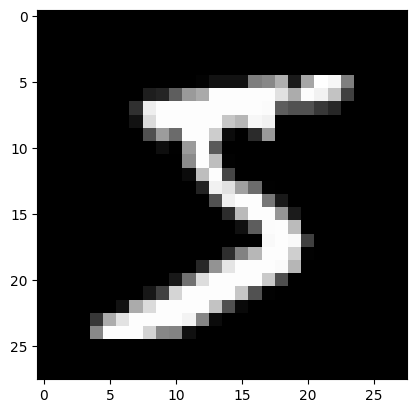

In [6]:
img, label = train_data[0]
print(img.shape)
plt.imshow(img.permute(1,2,0)) # img is in C x H x W -> so i converted to H x W x C

100

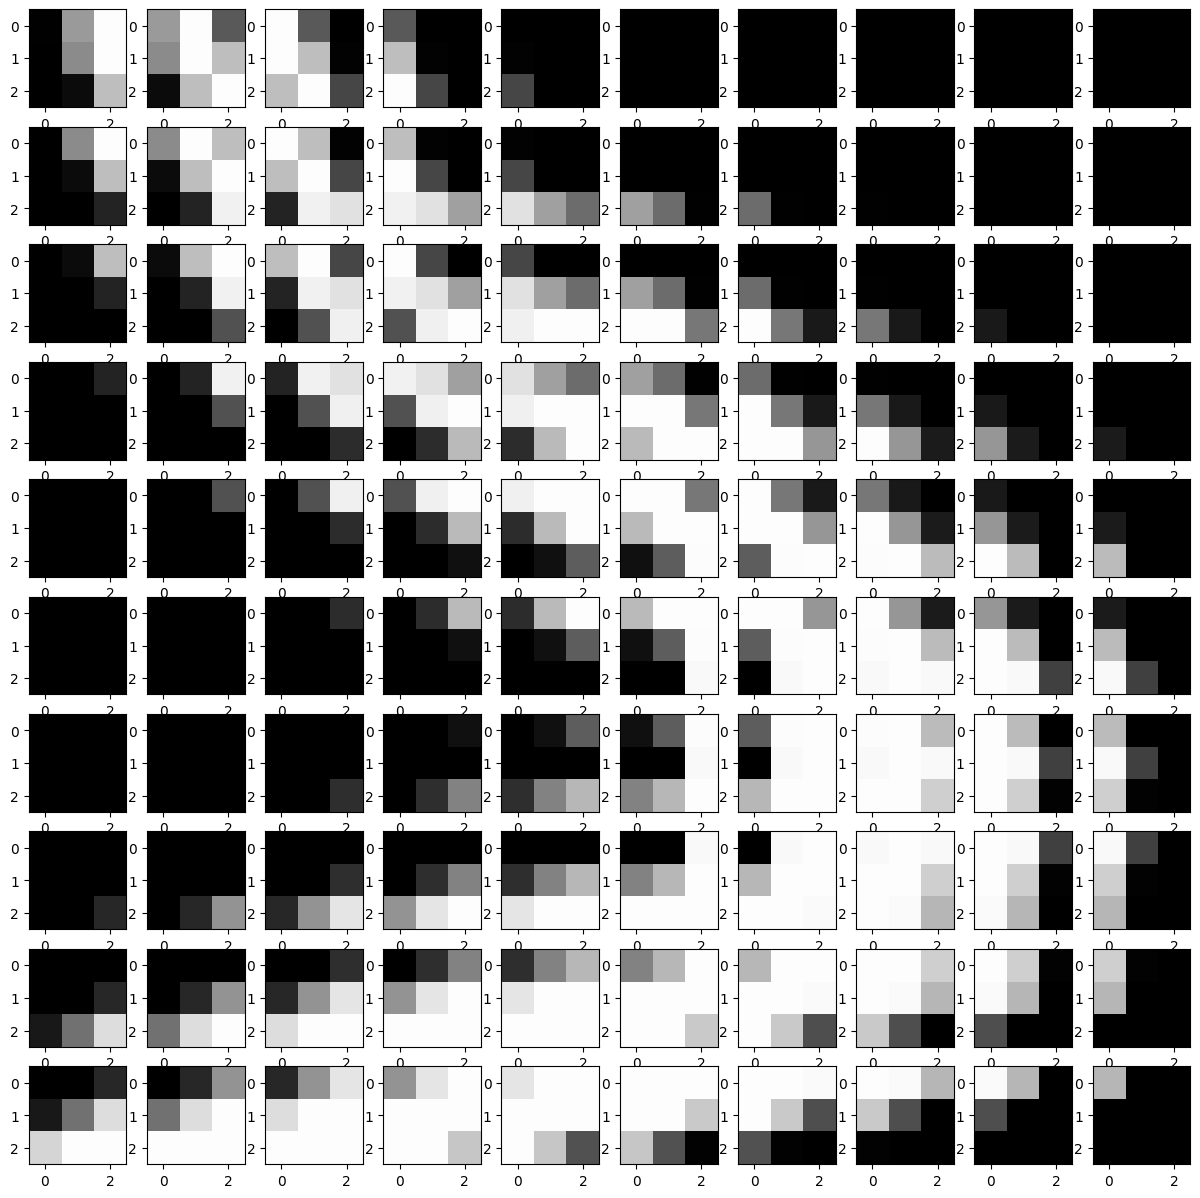

In [21]:
plt.figure(figsize=(15,15))

entire_sliced = []
for i in range(10, 20):
  for j in range(10, 20):
    sliced_img = img[:, i:i+3, j:j+3]
    entire_sliced.append(sliced_img)
    plt.subplot(10, 10, (i-10)*10+(j-10)+1)
    plt.imshow(sliced_img[0], vmin=0, vmax=1) # reduce channel axis
len(entire_sliced)

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [34]:
import torch.nn as nn
class CnnKernel(nn.Module):
  def __init__(self, output_ch=3, kernel_size=3):
    super().__init__()
    self.layer = nn.Linear(kernel_size*kernel_size*1, output_ch) # kernel_size is 3*3, input channel is 1
    self.kernel_size = kernel_size
    self.output_ch = output_ch

  def forward(self, x):
    # x: image tensor with shape of C x H x W
    channel, height, width = x.shape

    # output = []
    output_size = (self.output_ch, height - self.kernel_size +1, width - self.kernel_size + 1)
    output = torch.zeros(output_size)

    for i in range(height - self.kernel_size + 1):
      for j in range(width - self.kernel_size + 1):
        sliced_x = x[:, i:i+self.kernel_size, j:j+self.kernel_size]
        # flattened_x = sliced_x.flatten(1,2)
        flattened_x = sliced_x.reshape(channel, -1)
        sliced_out = self.layer(flattened_x)
        # output.append(sliced_out)
        output[:, i, j] = sliced_out
    return  output

kernel = CnnKernel()
# kernel.layer
# kernel.layer.weight.data = torch.Tensor([[1, 1, 1, 0, 0, 0, -1, -1, -1]])
out = kernel(img)
out.shape

torch.Size([3, 26, 26])

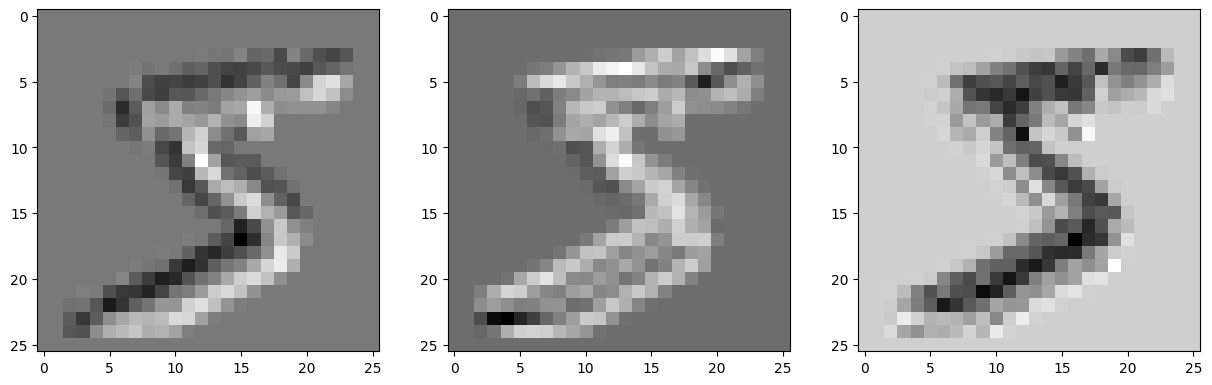

In [35]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(out[0].detach())
plt.subplot(1, 3, 2)
plt.imshow(out[1].detach())
plt.subplot(1, 3, 3)
plt.imshow(out[2].detach())